In [1]:
## Name: George P. Burdell
## Date: Jan 18, 2020
## Assignment: Create Wave File of Pulse Trains
## Assignment #4

## Class: ECE 435/535 Winter 2020
## Instructor: Mr. McGarvey

## Estimated Time to complete


In [2]:
# Setup Notebook
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal


In [3]:
# Setup Parameters
DEBUG = False
#___|Center Freq = fc |______________________________|Center Freq = fc |_________________
#   [<------- Pulse Repetition Interval = PRI   ---->]
#   [<--Pulse Width-->]
amplitude = np.iinfo(np.int16).max
A = amplitude
fc = 1000 # 5kHz kilohertz
PRI = 0.5 # seconds

# Class decided on number of Periods or wavelengths in a pulse
num_periods = 20
Tc = 1/fc
PW = Tc*num_periods

print('='*20)
print("Time and Frequency")
print('PRI:{} s, PW {}s, Fc {} Hz, Tc {} s'.format(PRI, PW, fc, Tc))
print('\n')

# Spatial information 
vp = 343 # m/s speed of sound 
PRI_x = PRI * vp
PW_x = PW * vp
kc = fc/vp
Lc = vp/fc

print('='*20)
print("Space and Time")
print('PRI:{:.02f} m, PW {:.02f} m, kc {:.02f} cycles/meter, lambda {:.02f} m'
      .format(PRI_x, PW_x, kc, Lc))


Time and Frequency
PRI:0.5 s, PW 0.02s, Fc 1000 Hz, Tc 0.001 s


Space and Time
PRI:171.50 m, PW 6.86 m, kc 2.92 cycles/meter, lambda 0.34 m


In [4]:
# Making the data pretty
import pandas as pd
data1 = [[PRI, PW, fc, Tc],[PRI, PW*1e3, fc/1e3, Tc*1e6]]
pd.DataFrame(data1[1:], columns=["PRI (s)", "PW(ms)", "fc (kHz)", "Tc ($\mu$s)"])





,PRI (s),PW(ms),fc (kHz),Tc ($\mu$s)
0,0.5,20.0,1.0,1000.0


In [5]:
data2 = [[PRI_x, PW_x, kc, Lc],[PRI_x, PW_x, kc, Lc]]
pd.DataFrame(data2[1:], columns=["PRI (m)", "PW(m)", "kc (cycles/meter)", "$\lambda$ (m)"])


,PRI (m),PW(m),kc (cycles/meter),$\lambda$ (m)
0,171.5,6.86,2.915452,0.343


## Making the unit waveform

In [6]:
# samples per period 
#samps_per_period = 10
FS_MAX = 100000 # maximum sample rate for audio transmitter

# create the time step for sampling 
fmax = fc 
Tmax = 1/fmax
dt = Tmax/20

# Optional: create a waveform with dt/[2,3,4,5,6,7,8,9,10,15,20] and plot the FFTs of each 
# You should see what happens to the energy when the signals are reproduced cleanly. 

# calculate required sample rate
fs = 1/dt
derp = fs < FS_MAX
print('Desired Sample Rate : {} samples/sec'.format(fs))
print('Sample Rate Check: is {} less than {} == {}'.format(fs, FS_MAX, derp))

if derp == False:
    print('\n ***** Desired Sample Rate too high! ***** ')
else:
    print(' Desired Sample Rate usable')
    

Desired Sample Rate : 20000.0 samples/sec
Sample Rate Check: is 20000.0 less than 100000 == True
 Desired Sample Rate usable


Samples in unit vector 10000


Text(0.5, 1.0, 'Time Series Vector')

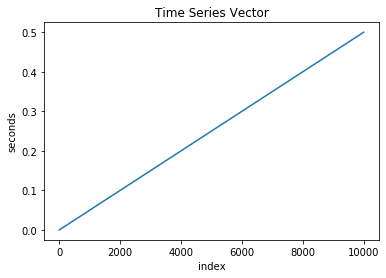

In [7]:
# create the time series array
t_unit = PRI
t_vector = np.arange(0,t_unit,dt)
print('Samples in unit vector {}'.format(len(t_vector)))
plt.plot(t_vector)
plt.xlabel('index')
plt.ylabel('seconds')
plt.title('Time Series Vector')

# checking to see if we are creating it correctly

In [8]:
print(PW)

0.02


Text(0.5, 1.0, 'Mask for Pulse Train PW = 0.02s')

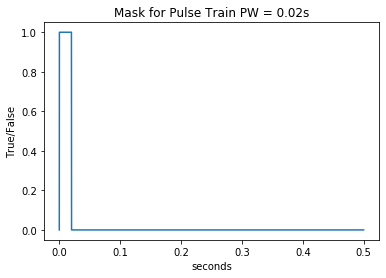

In [9]:
## Making PW the iteration way
# now we are going to create a mask for bits that will be on or off
# create a single pulse train
# 111111000000000


mask = np.zeros_like(t_vector)
sample = t_vector[0]
idx = 1 
while sample < PW:
    mask[idx] = 1
    idx = idx+1
    sample = t_vector[idx]

plt.plot(t_vector[:len(mask)],mask)
plt.xlabel('seconds')
plt.ylabel('True/False')
plt.title('Mask for Pulse Train PW = {}s'.format(PW))

Text(0.5, 1.0, 'Mask for Pulse Train PW = 0.02s')

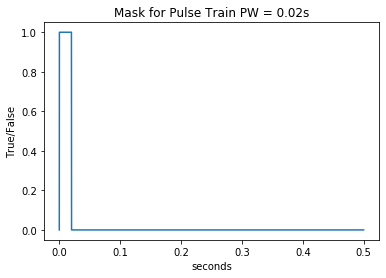

In [10]:
## Create mask vector method
# figure out how many samples are in the pulse
PWidx = np.int(PW/dt)

mask_vector = np.zeros_like(t_vector)
mask_vector[:PWidx] = 1 

mask_vector[0]=0 # makes the pulse nice. 

plt.plot(t_vector,mask_vector)
plt.xlabel('seconds')
plt.ylabel('True/False')
plt.title('Mask for Pulse Train PW = {}s'.format(PW))

In [22]:
# Create the sine wave
import scipy
amplitude = np.iinfo(np.int16).max
A =amplitude
print(fc)
#data = amplitude * np.sin(2. * np.pi * freq * t)
signal = A*np.sin(2. * np.pi*np.int(fc)*t_vector)
signal2 = scipy.signal.chirp(t_vector, fc, t1, f1, method='linear', phi=0, vertex_zero=True)
#signal = A*np.sin(2. * np.pi*np.int(fc)*t_vector*scipy.signal.sawtooth(t_vector))

plt.plot(t_vector[0:PWidx//200], signal[0:PWidx//200],'o-')
#plt.plot(t_vector[:PWidx], signal[:PWidx]) # zeros are optional 
plt.title('Fc {} kHz    For the duration of the pulse'.format(fc/1e3))
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
signal[:20]

1000


NameError: name 't1' is not defined

In [21]:
# now combine everything
signal = signal * mask
plt.plot(t_vector,signal)
plt.title('Pulse Train Unit')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')

ValueError: operands could not be broadcast together with shapes (1220000,) (10000,) 

In [13]:
# Now we make a long time series of these
t_max = 60+.01 # 5 min the +3 is to show rounding

periods_to_copy = t_max / PRI
print('Periods to copy {}'.format(periods_to_copy))
periods_to_copy = np.int(np.ceil(periods_to_copy))
print('Periods to copy {}'.format(periods_to_copy))

unit_signal = signal
signal = None
signal = unit_signal
for idx in range(0,periods_to_copy):
    signal=np.concatenate((signal, unit_signal), axis=None)

t_max_idx = len(signal)
t_vector = np.arange(0,len(signal)*dt,dt)    
if DEBUG == True:
    plt.plot(t_vector, signal, 'xkcd:mango')
    plt.title('Pulse Train')
    plt.xlabel('Seconds')
    plt.ylabel('Amplitude')
    
print(len(signal)*dt)

Periods to copy 120.02
Periods to copy 121
61.0


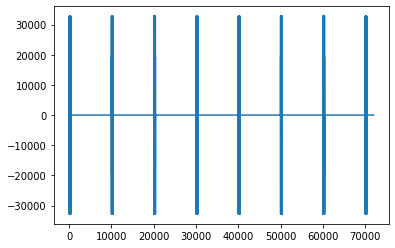

In [14]:
plt.plot(signal[:72000])

In [15]:

from scipy.io.wavfile import write
samplerate = 96000; 
'''
#freq = 100
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
print(amplitude)
data = amplitude * np.sin(2. * np.pi * freq * t)
write("example.wav", samplerate, data)
print(data[:20])
'''

'\n#freq = 100\nt = np.linspace(0., 1., samplerate)\namplitude = np.iinfo(np.int16).max\nprint(amplitude)\ndata = amplitude * np.sin(2. * np.pi * freq * t)\nwrite("example.wav", samplerate, data)\nprint(data[:20])\n'

In [16]:

# Write out the waveform
print(signal[0:20])
samplerate = np.int(fs)
print(fs)
write("PulseTrain1000_50_02.wav", samplerate, signal)
print(signal[0:20])

[ 0.00000000e+00  1.01255599e+04  1.92599594e+04  2.65090599e+04
  3.11632689e+04  3.27670000e+04  3.11632689e+04  2.65090599e+04
  1.92599594e+04  1.01255599e+04  4.01280017e-12 -1.01255599e+04
 -1.92599594e+04 -2.65090599e+04 -3.11632689e+04 -3.27670000e+04
 -3.11632689e+04 -2.65090599e+04 -1.92599594e+04 -1.01255599e+04]
20000.0
[ 0.00000000e+00  1.01255599e+04  1.92599594e+04  2.65090599e+04
  3.11632689e+04  3.27670000e+04  3.11632689e+04  2.65090599e+04
  1.92599594e+04  1.01255599e+04  4.01280017e-12 -1.01255599e+04
 -1.92599594e+04 -2.65090599e+04 -3.11632689e+04 -3.27670000e+04
 -3.11632689e+04 -2.65090599e+04 -1.92599594e+04 -1.01255599e+04]
